# 1<sup>η</sup> Εργαστηριακή Άσκηση
## Ανάλυση & Μελέτη Σύνθετων Τοπολογιών Δικτύου

<p style='text-align: justify;'> Στην παρούσα άσκηση θα δημιουργηθούν και θα αναλυθούν τοπολογίες, ορισμένες από τις οποίες χρησιμοποιούνται για την αναπαράσταση σύνθετων ή/και κοινωνικών δικτύων. Η ανάλυση θα γίνει μέσω των μετρικών ανάλυσης που παρουσιάστηκαν στις διαλέξεις του μαθήματος. Τα δίκτυα που θα μελετηθούν δίνονται στον Πίνακα 1.</p>

<table width="80%">
    <caption>Πίνακας $1$: Σύνθετα δίκτυα και χαρακτηριστικές παράμετροι</caption>
    <thead>
    <tr>
        <th>Τύπος Δικτύου</th>
        <th>Μοντέλο</th>
        <th>Αναγνωριστικό</th>
        <th>Παράμετροι</th>
    </tr>
    </thead>
    <tbody>
        <tr>
            <td style="background-color:#F2F4F7" rowspan="2">Πλέγμα</td>
            <td style="background-color:#F2F4F7" rowspan="2">Πεπερασμένο</td>
            <td style="background-color:#F2F4F7" rowspan="2">REG</td>
            <td style="background-color:#F2F4F7">Κόμβοι $n$</td>   
        </tr>
        <tr>
            <td style="background-color:#F2F4F7">Bαθμός $d$</td>
        </tr>
        <tr>
            <td style="background-color:#FFFFFF" rowspan="2">Τυχαίος γραφος</td>
            <td style="background-color:#FFFFFF" rowspan="2">Erdos-Renyi</td>
            <td style="background-color:#FFFFFF" rowspan="2">RG (ER)</td>
            <td style="background-color:#FFFFFF">Κόμβοι $n$</td>   
        </tr>
        <tr>
            <td style="background-color:#FFFFFF">Συνδέσεις $M$</td>
        </tr>
        <tr>
            <td style="background-color:#F2F4F7" rowspan="2">Τυχαίος γράφος</td>
            <td style="background-color:#F2F4F7" rowspan="2">Gilbert</td>
            <td style="background-color:#F2F4F7" rowspan="2">RG (G)</td>
            <td style="background-color:#F2F4F7">Κόμβοι $n$</td>   
        </tr>
        <tr>
            <td style="background-color:#F2F4F7">Πιθανότητα σύνδεσης $p$</td>
        </tr>
        <tr>
            <td style="background-color:#FFFFFF" rowspan="3">Τυχαίος γεωμετρικός γράφος</td>
            <td style="background-color:#FFFFFF" rowspan="3">Επίπεδος</td>
            <td style="background-color:#FFFFFF" rowspan="3">RGG</td> 
        </tr>
        <tr>
            <td style="background-color:#FFFFFF" >Ακτίνα $R$</td>
        </tr>
        <tr>
            <td style="background-color:#FFFFFF">Κόμβοι $n$</td>  
        </tr>
        <tr>
            <td style="background-color:#F2F4F7" rowspan="2">Scale-free</td>
            <td style="background-color:#F2F4F7" rowspan="2">Barabasi-Albert</td>
            <td style="background-color:#F2F4F7" rowspan="2">SF (BA)</td>
            <td style="background-color:#F2F4F7">Κόμβοι $n$</td>   
        </tr>
        <tr>
            <td style="background-color:#F2F4F7">Παράμετρος επισύναψης $d$</td>
        </tr>
        <tr>
            <td style="background-color:#FFFFFF" rowspan="3">Small-world</td>
            <td style="background-color:#FFFFFF" rowspan="3">Watts-Strogatz</td>
            <td style="background-color:#FFFFFF" rowspan="3">SW (WS)</td>
            <td style="background-color:#FFFFFF">Κόμβοι $n$ </td>   
        </tr>
        <tr>
            <td style="background-color:#FFFFFF" >Βαθμός αρχικού πλέγματος $d$</td>
        </tr>
        <tr>
            <td style="background-color:#FFFFFF">Πιθανότητα ανασύνδεσης $g_p$</td>  
        </tr>
    </tbody>
</table>

In [1]:
seedno = 600  #seed number !DO NOT CHANGE IT!

In [2]:
%matplotlib inline

import itertools
import functools
import collections
import operator
import statistics
import csv

import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

## Α. Κατασκευή και οπτικοποίηση σύνθετων τύπων δικτύου

### Τοπολογία REG για βαθμό πλέγματος $d = 4$

In [3]:
def draw_circular_with_labels(G, ax=None, node_size=80, font_color='C1', **kwargs):
    if ax is None:
        _, ax = plt.subplots(figsize=(6, 6))
    pos = nx.circular_layout(G)
    dilated_pos = {node: p * 1.1 for node, p in pos.items()}
    nx.draw(G, pos, **kwargs, ax=ax, node_size=node_size)
    nx.draw_networkx_labels(G, dilated_pos, ax=ax, font_color=font_color)
    return ax

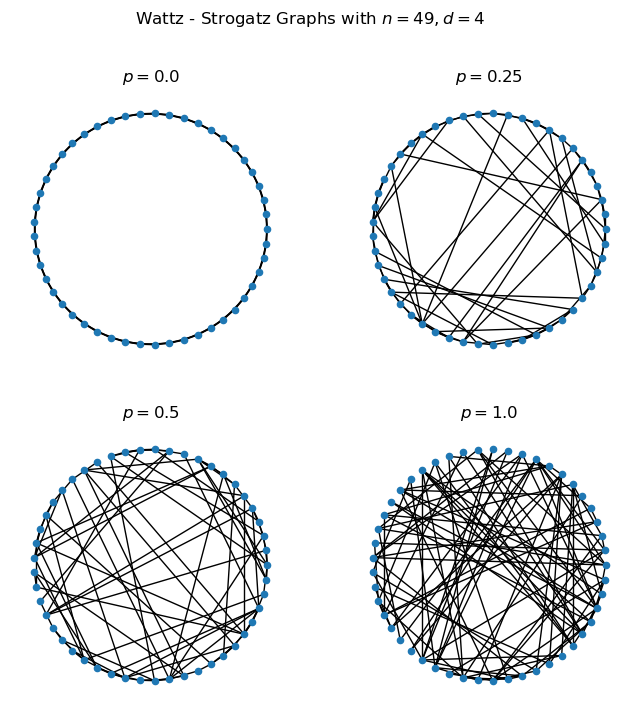

In [4]:
# random.seed(seedno)
# n=4x μέγεθος δικτύου: αντικαταστήστε το x με το τελευταίο ψηφίο του αριθμού μητρώου σας.
n = 49
d = 4
# για την κατασκευή του REG χρησιμοποιήστε την watts_strogatz_graph από το networkx.
# Επιλέξτε προσεκτικά την τιμή της παραμέτρου p.
# uncomment REG=
# οπτικοποίηση: χρησιμοποιήστε την draw_circular από το networkx

ps = 0.0, 0.25, 0.5, 1.0
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

for p, ax in zip(ps, axs.flat):
    REG = nx.watts_strogatz_graph(n=n, k=d, p=p, seed=seedno)
    nx.draw_circular(REG, node_size=20, ax=ax)
    ax.set_title(f'$p = {p}$')

fig.suptitle(f'Wattz - Strogatz Graphs with $n = {n}, d = {d}$')
plt.show()

REG = nx.watts_strogatz_graph(n=n, k=d, p=0.0, seed=seedno)

### Τοπολογία RG (ER) για αριθμό συνδέσεων $M = 150$

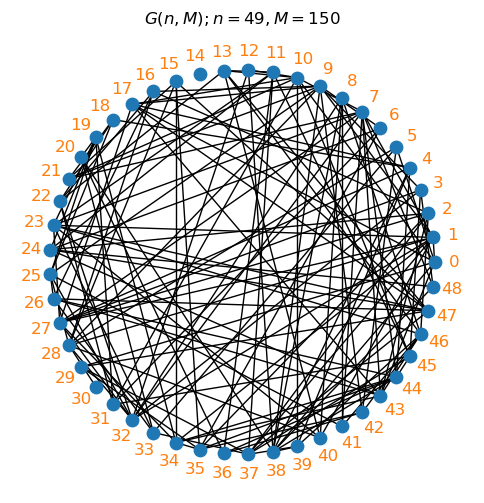

In [5]:
# random.seed(seedno)
#n=4x
n = 49
M = 150

# για την κατασκευή του RGER χρησιμοποιήστε την gnm_random_graph από το networkx
#uncomment RGER=

# οπτικοποίηση: χρησιμοποιήστε την draw_circular από το networkx

RGER = nx.gnm_random_graph(n=n, m=M, seed=seedno)

draw_circular_with_labels(RGER)
plt.title(f'$G(n, M); n = {n}, M = {M}$')
plt.axis('equal')
plt.show()

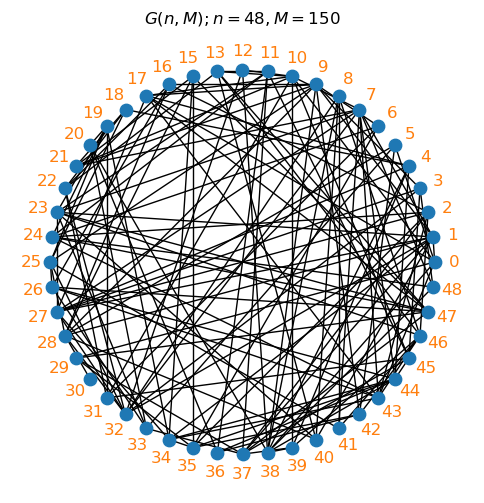

In [6]:
# Dropping the single disconnected node
RGER = nx.subgraph(RGER, max(nx.connected_components(RGER), key=len))

draw_circular_with_labels(RGER)
plt.title(f'$G(n, M); n = {RGER.number_of_nodes()}, M = {M}$')
plt.axis('equal')
plt.show()

### Τοπολογία RGG  με ακτίνα σύνδεσης $R=0.35$

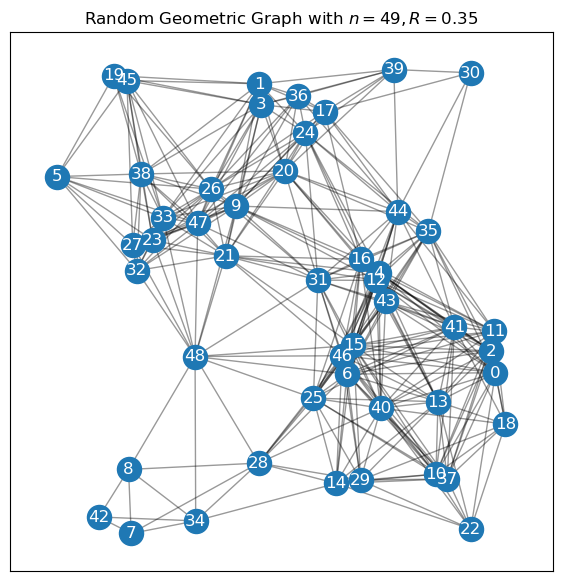

In [7]:
# random.seed(seedno)
# n=4x
n = 49
R = 0.35

# για την κατασκευή του RGG χρησιμοποιήστε την random_geometric_graph από το networkx
#uncomment RGG=

#οπτικοποίηση: https://networkx.org/documentation/stable/auto_examples/drawing/plot_random_geometric_graph.html

RGG = nx.random_geometric_graph(n=n, radius=R, seed=seedno)
pos = nx.get_node_attributes(RGG, 'pos')
# central = min(pos, key=lambda i: (pos[i][0] - 0.5)**2 + (pos[i][1] - 0.5)**2)
# dists = nx.single_source_shortest_path_length(RGG, central)

plt.figure(figsize=(7, 7))
nx.draw_networkx_edges(RGG, pos=pos, alpha=0.4)
nx.draw_networkx_nodes(
    RGG, pos=pos, node_size=300,
    # nodelist=list(dists), node_color=list(dists.values()), cmap=plt.cm.Blues_r,
)
nx.draw_networkx_labels(RGG, pos, font_color='white')

plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.title(f'Random Geometric Graph with $n = {n}, R = {R}$')
plt.axis('equal')
plt.show()

### Τοπολογία SF με παράμετρο επισύναψης $d=4$

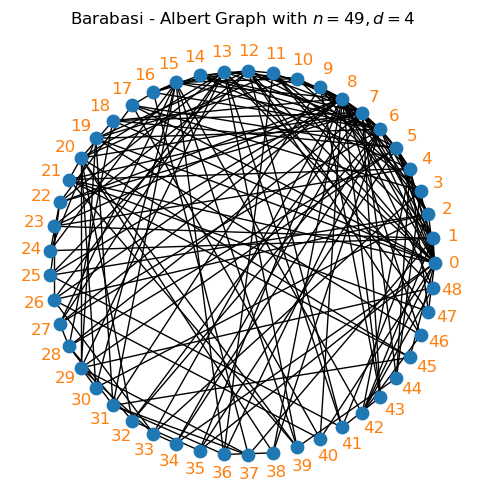

In [8]:
# random.seed(seedno)
#n=4x
n = 49
d = 4

# για την κατασκευή του SF χρησιμοποιήστε την barabasi_albert_graph από το networkx
#uncomment SF=
#οπτικοποίηση: χρησιμοποιήστε την draw_circular από το networkx

SF = nx.barabasi_albert_graph(n=n, m=d, seed=seedno)
draw_circular_with_labels(SF)
plt.title(f'Barabasi - Albert Graph with $n = {n}, d = {d}$')
plt.axis('equal')
plt.show()

### Τοπολογία SW με βαθμό αρχικού πλέγματος $d=4$ και πιθανότητα ανασύνδεσης $p=0.25$

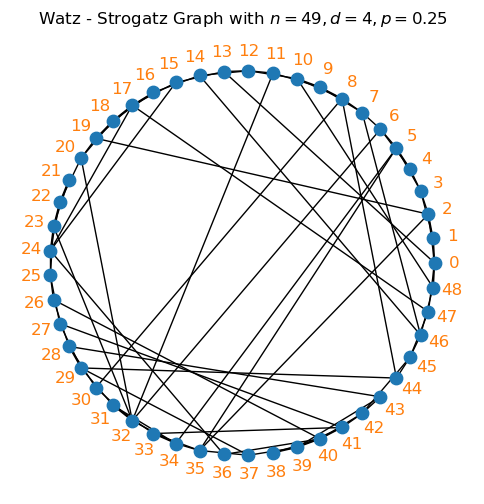

In [9]:
# random.seed(seedno)
#n=4x
n = 49
d = 4
p = 0.25

# για την κατασκευή του SW χρησιμοποιήστε την watts_strogatz_graph από το networkx.
#uncomment SW=

#οπτικοποίηση: χρησιμοποιήστε την draw_circular από το networkx

SW = nx.watts_strogatz_graph(n=n, k=d, p=p, seed=seedno)
draw_circular_with_labels(SW)
plt.title(f'Watz - Strogatz Graph with $n = {n}, d = {d}, p = {p}$')
plt.axis('equal')
plt.show()

## B. Μετρικές δικτύου

### B1. Συντελεστής ομαδοποίησης (Clustering coefficient)

#### Για κάθε μια από τις τοπολογίες REG, RG(ER), RGG, SF(BA) και SW(WS):
#### Β1.1 Να υπολογιστεί ο συντελεστής ομαδοποίησης κάθε κόμβου και να αναπαρασταθεί η κατανομή του.
#### Β1.2  Να υπολογιστεί ο μέσος συντελεστής ομαδοποίησης και η διασπορά του.
#### Β.1.3 Να βρεθούν οι κόμβοι με το μικρότερο και το μεγαλύτερο συντελεστή ομαδοποίησης. 
#### Να σχολιαστούν τα αποτελέσματα.

In [10]:
RG_G = nx.gnp_random_graph(n=n, p=0.5)
graphs = {'REG': REG, 'RG(ER)': RGER, 'RG(G)': RG_G, 'RGG': RGG, 'SF(BA)': SF, 'SW(WS)': SW}

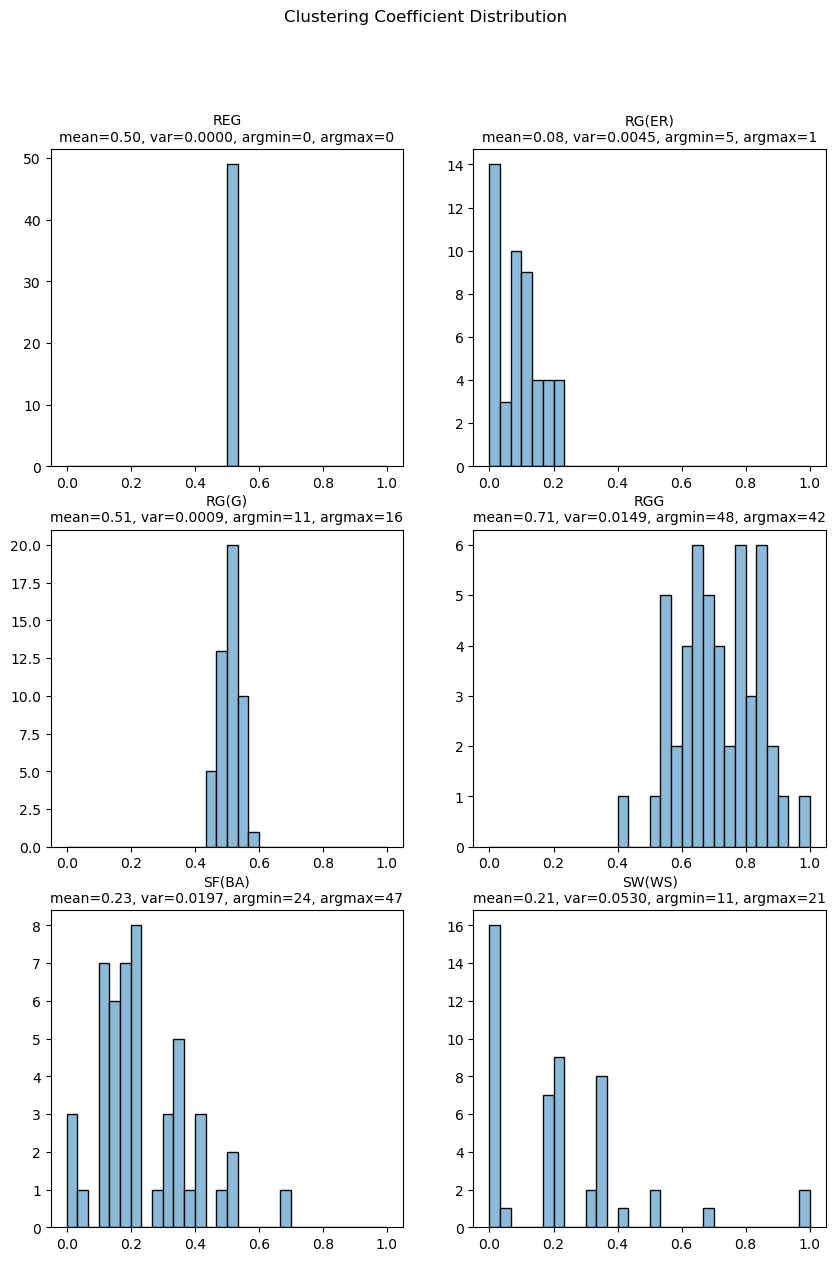

In [11]:
HIST_PARAMS = dict(ec='#090c0e', fc='#8ebad9')


def plot_clustering_coefficient_distribution(G, name, nbins=30, ax=None):
    if ax is None:
        _, ax = plt.subplots()

    cc = nx.clustering(G)
    mean = statistics.mean(cc.values())
    var = statistics.variance(cc.values())
    argmin = min(cc, key=cc.get)
    argmax = max(cc, key=cc.get)

    bins = np.linspace(0, 1, nbins + 1)
    ax.hist(cc.values(), bins=bins, **HIST_PARAMS)
    ax.set_title(f'{name}\nmean={mean:.2f}, var={var:.4f}, argmin={argmin}, argmax={argmax}', fontsize=10)


def plot_grid(graphs, plot_fn, suptitle):
    assert len(graphs) <= 6
    fig, axs = plt.subplots(3, 2, figsize=(10, 14))

    for (name, G), ax in zip(graphs.items(), axs.flat):
        plot_fn(G, name, ax=ax)

    fig.suptitle(suptitle)
    return axs


plot_grid(graphs, plot_clustering_coefficient_distribution, "Clustering Coefficient Distribution")
plt.show()

#### Σχόλια

* **REG**

    Κάθε κόμβος έχει 4 γείτονες. Οι 2 άμεσοι γείτονες στο κυκλικό πλέγμα συνδέονται έκαστος με 2 από τους άλλους γείτονες, ενώ οι άλλοι 2 γείτονες συνδέονται με 1 άλλον γείτονα. Συνεπώς έχουμε $\frac{2 \cdot 2 + 2 \cdot 1}{2} = 3$ συνδέσεις από τις $\frac{4 \cdot 3}{2} = 6$ πιθανές, και έτσι ο τοπικός συντελεστής ομαδοποίησης είναι $\frac{3}{6} = \frac{1}{2}$, για κάθε κόμβο.

* **RG(ER) γνωστό και ως $G(n, M)$**

    Η κατανομή φαίνεται σχετικά ομοιόμορφη. Επίσης είναι συγκεντρωμένη σε χαμηλές τιμές, [πράγμα που ισχύει γενικά για το G(n, M)](https://en.wikipedia.org/wiki/Erd%C5%91s%E2%80%93R%C3%A9nyi_model#Caveats)

* **RG(G)**

    Η αναμενόμενη τιμή του συντελεστή ομαδοποίησης είναι $p = 0.5$, αφού κάθε ακμή μεταξύ γειτόνων ενός κόμβου έχει πιθανότητα p να εμφανιστεί, και αυτό φαίνεται στο γράφημα.
    
* **RGG**

    [Ο συντελεστής συσχέτισης του RGG](https://en.wikipedia.org/wiki/Random_geometric_graph#Clustering_coefficient) είναι
    $$
    1 - \frac{1}{\sqrt{\pi}} \frac{\Gamma(1)}{\Gamma(\frac{3}{2})} \left(\frac{3}{4}\right) ^ {\frac{3}{2}}
    = 1 - \frac{3 \sqrt{3}}{4 π^{3/2}} \approx 0.7667
    $$
    Παρατηρούμε πως υπάρχει μεγάλη διακύμανση και πως ο δειγματικός μέσος δεν είναι πολύ κοντά στον θεωρητικό.

    Οι τιμές τους συντελεστή είναι πολύ υψηλές, που είναι διαισθητικά λογικό μιας για κάθες κόμβο όλοι οι γείτονες σε μία περιοχή ακτίνας R είναι πλήρως συνδεδεμένοι.

* **SF(BA)**
    
    Παρατηρούμε πως o συντελεστής ομαδοποίησης είναι σχετικά χαμηλός.

* **SW(WS)**

    Η κατανομή παρουσιάζει μεγάλη διακύμανση.

### Β2. Μέσο μήκος μονοπατιού - Διάμετρος - Ακτίνα γράφου

#### Για κάθε μια από τις τοπολογίες REG, RG(ER), RGG, SF(BA) και SW(WS):
#### Β2.1 Nα υπολογιστεί το μέσο μήκος μονοπατιού και η διασπορά του. Προτείνεται η χρήση της συνάρτησης  all_pairs_shortest_path_length του networkx.
#### B2.2 Να υπολογιστεί η διάμετρος (συνάρτηση diameter) και η ακτίνα (συνάρτηση radius).
#### Για τα παραπάνω πραγματοποιήστε συγκρίσεις και εξηγήστε με βάση τα χαρακτηριστικά της κάθε τοπολογίας όπως παρουσιάζονται στη θεωρία.

In [12]:
def path_metrics(G):
    shortest_paths = dict(nx.all_pairs_shortest_path_length(G))
    
    path_lengths = [
        length
        for source, lengths in shortest_paths.items()
        for target, length in lengths.items()
        if source != target
    ]
    mean = statistics.mean(path_lengths)
    var = statistics.variance(path_lengths)
    
    if nx.is_connected(G):
        eccentricities = nx.eccentricity(G, sp=shortest_paths)
        radius = nx.radius(G, eccentricities)
        diameter = nx.diameter(G, eccentricities)
    else:
        radius = None
        diameter = None

    return dict(mean=mean, var=var, radius=radius, diameter=diameter)


{name: path_metrics(G) for name, G in graphs.items()}

{'REG': {'mean': 6.5, 'var': 11.921735431731179, 'radius': 12, 'diameter': 12},
 'RG(ER)': {'mean': 2.2349290780141846,
  'var': 0.4760477111540941,
  'radius': 3,
  'diameter': 4},
 'RG(G)': {'mean': 1.5008503401360545,
  'var': 0.2501056143427171,
  'radius': 2,
  'diameter': 2},
 'RGG': {'mean': 2.1301020408163267,
  'var': 0.8652440559379856,
  'radius': 3,
  'diameter': 5},
 'SF(BA)': {'mean': 2.063775510204082,
  'var': 0.3676876535386592,
  'radius': 2,
  'diameter': 4},
 'SW(WS)': {'mean': 3.1683673469387754,
  'var': 1.2953324247606317,
  'radius': 4,
  'diameter': 6}}

#### Σχόλια

Το REG έχει τις μεγαλύτερες αποστάσεις, αφού τα μονοπάτια ακολουθούν τον κύκλο με βήμα 2 (και ίσως 1 στο τελευταίο). Επίσης η διάμετρος είναι ίση με την ακτίνα αφού όλες οι εκκεντρότητες είναι ίσες και με τιμή `(49 // 2) // 2 = 12`.

Το RGG έχει τις μικρότερες αποστάσεις, που σχετίζεται με το γεγονός του ότι ο συντελεστής ομαδοποίησης είναι υψηλός.

To SW(WS) παρουσιάζει την μεγαλύτερη διακύμανση μήκους μονοπατιών, το οποίο οφείλεται στα rewirings που μπορούν να αλλάξουν τις αποστάσεις μεταξύ κόμβων σε οποιοδήποτε βαθμό.

#### B.2.3 Για κάθε τοπολογία, ποιος κόμβος συνδέεται με τους περισσότερους κόμβους με μήκος ελάχιστου μονοπατιού ίσο με τη διάμετρο της τοπολογίας?

In [13]:
# να προσδιοριστεί το label του κόμβου και το σύνολο των κόμβων
# με τους οποίους συνδέεται με μήκος ελάχιστου μονοπατιού ΄ίσο με τη διάμετρο.


def most_opposites(G):
    shortest_paths = dict(nx.all_pairs_shortest_path_length(G))

    if not nx.is_connected(G):
        return None
    eccentricities = nx.eccentricity(G, sp=shortest_paths)

    diameter = nx.diameter(G, eccentricities)

    diametrically_opposite = collections.defaultdict(list)
    for source, lengths in shortest_paths.items():
        for target, length in lengths.items():
            if length == diameter:
                diametrically_opposite[source].append(target)

    max_num_opposite = max(map(len, diametrically_opposite.values()))
    best = {source: targets for source, targets in diametrically_opposite.items() if len(targets) == max_num_opposite}

    return best


{name: most_opposites(G) for name, G in graphs.items()}

{'REG': {0: [23, 24, 25, 26],
  1: [24, 25, 26, 27],
  2: [25, 26, 27, 28],
  3: [26, 27, 28, 29],
  4: [27, 28, 29, 30],
  5: [28, 29, 30, 31],
  6: [32, 29, 30, 31],
  7: [32, 33, 30, 31],
  8: [32, 33, 34, 31],
  9: [32, 33, 34, 35],
  10: [33, 34, 35, 36],
  11: [34, 35, 36, 37],
  12: [35, 36, 37, 38],
  13: [36, 37, 38, 39],
  14: [37, 38, 39, 40],
  15: [38, 39, 40, 41],
  16: [39, 40, 41, 42],
  17: [40, 41, 42, 43],
  18: [41, 42, 43, 44],
  19: [42, 43, 44, 45],
  20: [43, 44, 45, 46],
  21: [44, 45, 46, 47],
  22: [45, 46, 47, 48],
  23: [0, 46, 47, 48],
  24: [0, 1, 47, 48],
  25: [0, 1, 2, 48],
  26: [0, 1, 2, 3],
  27: [1, 2, 3, 4],
  28: [2, 3, 4, 5],
  29: [3, 4, 5, 6],
  30: [4, 5, 6, 7],
  31: [5, 6, 7, 8],
  32: [6, 7, 8, 9],
  33: [7, 8, 9, 10],
  34: [8, 9, 10, 11],
  35: [9, 10, 11, 12],
  36: [10, 11, 12, 13],
  37: [11, 12, 13, 14],
  38: [12, 13, 14, 15],
  39: [13, 14, 15, 16],
  40: [14, 15, 16, 17],
  41: [15, 16, 17, 18],
  42: [16, 17, 18, 19],
  43: [17, 

#### Περιφέρεια του γράφου ορίζεται να είναι το σύνολο των κόμβων του που έχουν εκκεντρότητα ίση με τη διάμετρό του. 
#### Κέντρο του γράφου ορίζεται να είναι το σύνολο των κόμβων του που έχουν εκκεντρότητα ίση με την ακτίνα του.  
#### Β.2.4 Για κάθε τοπολογία, να βρεθεί η περιφέρεια και το κέντρο της και να σχολιαστούν τα αποτελέσματα.

In [14]:
def periphery_and_center(G):
    if not nx.is_connected(G):
        return None
    eccentricities = nx.eccentricity(G)

    periphery = nx.periphery(G, eccentricities)
    center = nx.center(G, eccentricities)

    return dict(periphery=periphery, center=center)


{name: periphery_and_center(G) for name, G in graphs.items()}

{'REG': {'periphery': [0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   33,
   34,
   35,
   36,
   37,
   38,
   39,
   40,
   41,
   42,
   43,
   44,
   45,
   46,
   47,
   48],
  'center': [0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   33,
   34,
   35,
   36,
   37,
   38,
   39,
   40,
   41,
   42,
   43,
   44,
   45,
   46,
   47,
   48]},
 'RG(ER)': {'periphery': [4,
   6,
   10,
   11,
   18,
   20,
   24,
   29,
   30,
   31,
   33,
   36,
   39,
   41,
   43,
   44,
   45,
   46,
   48],
  'center': [0,
   1,
   2,
   3,
   5,
   7,
   8,
   9,
   12,
   13,
   15,
   16,
   17,
   19,
   21,
   22,
   23,
   25,
   26,
   27,
   2

#### Σχόλια

Παρατηρούμε πως στο REG, όλα τα σημεία ανήκουν στο κέντρο αλλά και στην περιφέρεια, αφού η εκκεντρότητα είναι η ίδια για κάθε κόμβο, όπως εξηγήθηκε σε προηγούμενη ενότητα.

Στο RG(ER) έχουμε διάμετρο 4 και ακτίνα 3 που είναι σχετικά μικρές τιμές, και αυτό οφείλεται στο ότι το $M$ είναι αρκετά μεγάλο δεδομένου του $n$. Αφού το εύρος τιμών είναι αρκετά μικρό ({1,2,3,4} και {1,2,3}) έχουμε μεγάλο πλήθος σημείων επί της περιφέρειας και του κέντρου. Η ίδια κατάσταση ισχύει και για το RG(G).

Στo SW(WS), επειδή τα μονοπάτια τείνουν να είναι μικρά (εξ ου και το όνομα small-world), οι μεγάλες τιμές (εκκεντρότητες) δεν είναι είναι συνηθισμένες, άρα και η περιφέρεια (εκεί όπου η εκκεντρότητα είναι μέγιστη = 4 = διάμετρος) δεν θα είναι μεγάλη. Στην περίπτωσή μας, ούτε το κέντρο είναι μεγάλο, γιατί δεν έτυχε κόμβος που να έχει μικρή εκκεντρότητα (ακτίνα 4).

## Γ) Mετρικές κεντρικότητας κόμβων

### Γ1. Κεντρικότητα βαθμού (Degree centrality)
##### Γ1.1 Να αναπαρασταθεί η κατατανομή βαθμών κόμβων για κάθε τοπολογία.
##### Γ1.2 Να υπολογιστεί ο μέσος βαθμός κόμβου καθώς και η διασπορά των βαθμών κόμβου για κάθε τοπολογία.
##### Να σχολιαστούν τα αποτελέσματα.

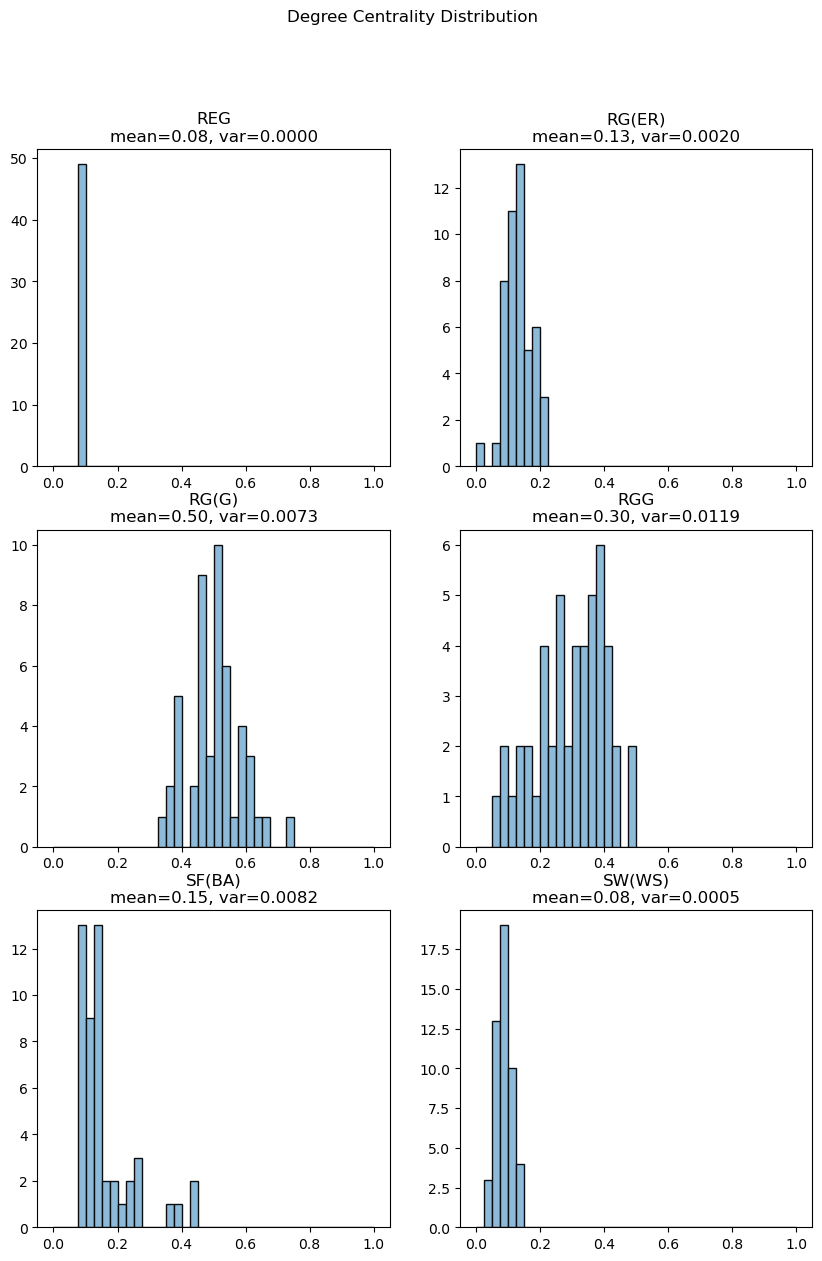

In [15]:
def plot_centrality_distribution(centrality_fn, nbins=40):

    def inner(G, name, nbins=nbins, ax=ax):
        if ax is None:
            _, ax = plt.subplots()

        centralities = centrality_fn(G).values()
        mean = statistics.mean(centralities)
        var = statistics.variance(centralities)

        bins = np.linspace(0, 1, nbins + 1)
        ax.hist(centralities, bins=bins, **HIST_PARAMS)
        ax.set_title(f'{name}\nmean={mean:.2f}, var={var:.4f}')

    return inner


plot_grid(graphs, plot_centrality_distribution(nx.degree_centrality), 'Degree Centrality Distribution')
plt.show()

#### Σχόλια

Στo REG όλοι οι κόμβοι έχουν βαθμό 4, και για αυτό έχουμε σταθερή κεντρικότητα βαθμού $\frac{4}{49 - 1} \approx 0.083$.

Στο RG(G) η κεντρικότητα βαθμού έχει μέση τιμή $p = 0.5$ εκ κατασκευής. Η κατανομή του βαθμού είναι διωνυμική $B(n-1, p)$. Η ίδια κατανομή είναι και της κεντρικότητας βαθμού απλά αντί για $i$ έχουμε $\frac{i}{n-1}$, όπου $i=0, 1, \dots, n-1$.

Το SF(BA) φαίνεται να ακολουθεί τον θεωρητικό τού κανόνα της δύναμης $k^{-3}$.

Η κατανομή του SW(WS) είναι στην ουσία η (dirac) κατανομή του "REG" με λίγο "θόρυβο", όπως είναι επόμενο από τον τρόπο κατασκευής του γραφήματος.

### Γ2. Κεντρικότητα εγγύτητας (Closeness centrality)
##### Γ2.1 Να αναπαρασταθεί η κατατανομή της εγγύτητας κόμβων για κάθε τοπολογία.
##### Γ2.2 Να υπολογιστεί η μέση εγγύτητα καθώς και η διασπορά της για κάθε τοπολογία.
##### Να σχολιαστούν τα αποτελέσματα.

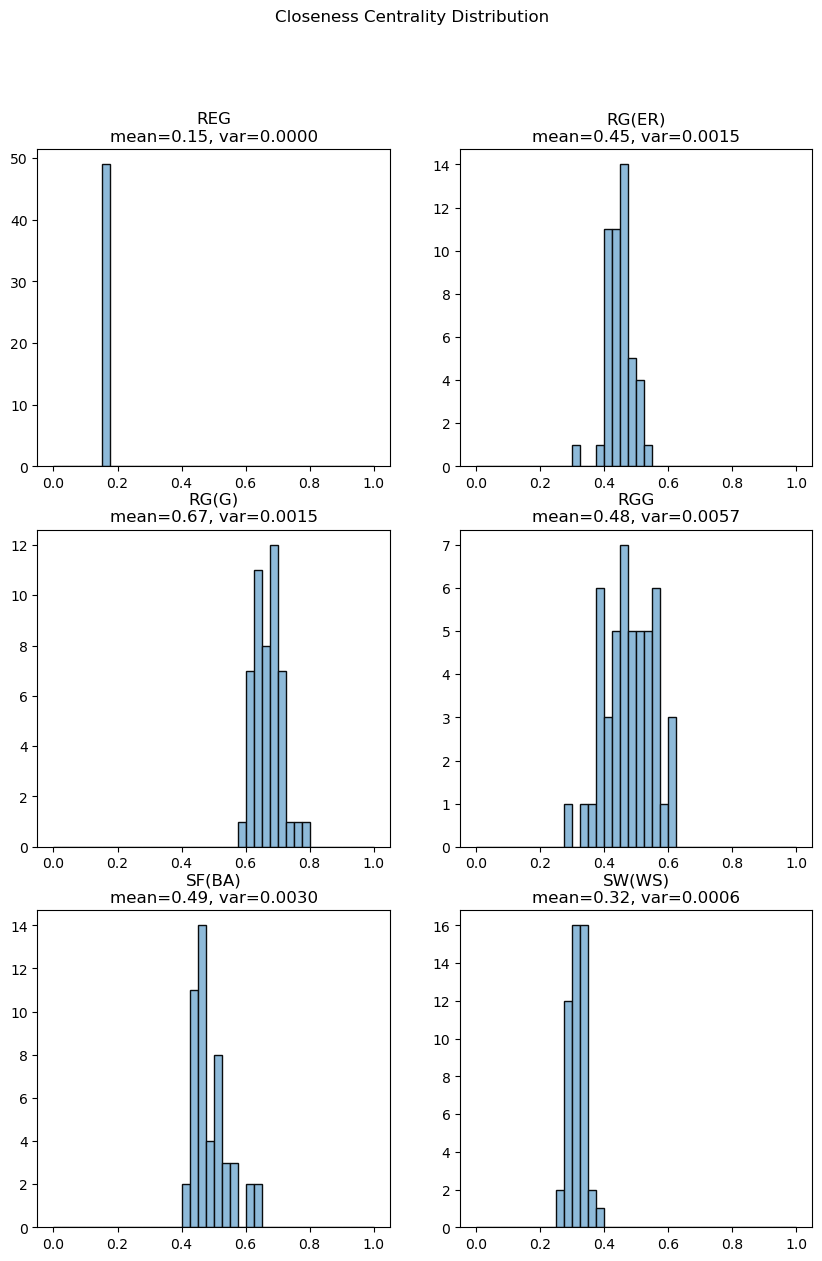

In [16]:
plot_grid(graphs, plot_centrality_distribution(nx.closeness_centrality), 'Closeness Centrality Distribution')
plt.show()

#### Σχόλια

Στο REG το άθροισμα των αποστάσεων είναι το ίδιο για κάθε κόμβο, λόγω συμμετρίας.

Οι διακύμανση σε όλες της κατανομές είναι σχετικά μικρή, και τα σχήματα των κατανομών είναι σχετικά συμμετρικά.

### Γ3. Ενδιαμεσική κεντρικότητα (Betweenness centrality)
##### Γ3.1 Να αναπαρασταθεί η κατατανομή της ενδιαμεσικής κεντρικότητας κόμβων για κάθε τοπολογία.
##### Γ3.2 Να υπολογιστεί η μέση ενδιαμεσική κεντρικότητα καθώς και η διασπορά της για κάθε τοπολογία.
##### Να σχολιαστούν τα αποτελέσματα.

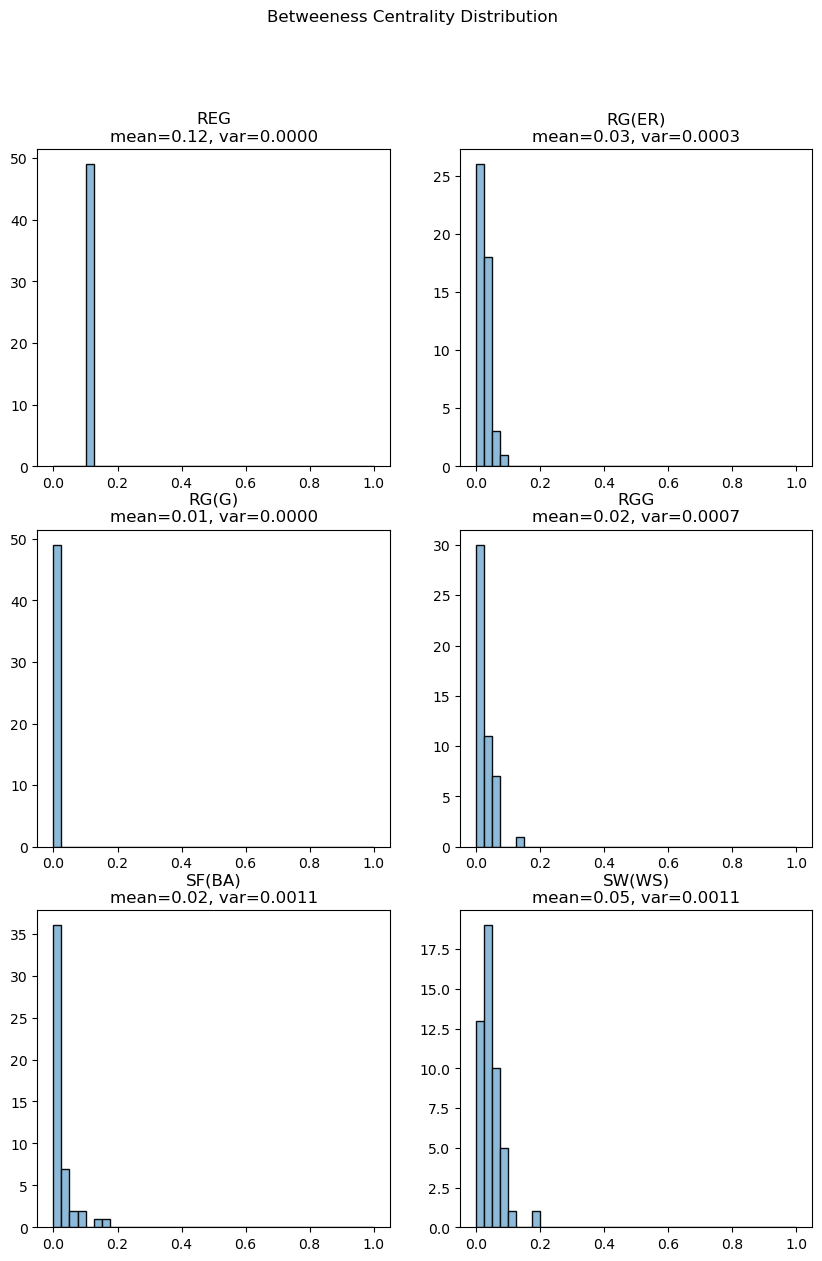

In [17]:
plot_grid(graphs, plot_centrality_distribution(nx.betweenness_centrality), 'Betweeness Centrality Distribution')
plt.show()

#### Σχόλια

Παρατηρούμε πως το SW(WS) έχει κόμβους με σχετικά μεγάλο betweeness, το οποίο οφείλεται στο ότι τα μονοπάτια μεταξύ κόμβων είναι πιο λίγα και συγκεκριμένα, γιατί προκύπτουν από τις τυχαίες ανασυνδέσεις. Στο REG έχουμε σταθερή τιμή λόγω συμμετρίας.

### Γ4. Kεντρικότητα Katz
##### Γ4.1 Να αναπαρασταθεί η κατανομή της κεντρικότητας Katz των κόμβων για κάθε τοπολογία. 
Για τον προσδιορισμό της παραμέτρου $a$ της συνάρτησης katz_centrality,  να υπολογιστεί η μεγαλύτερη ιδιοτιμή $λ_{max}$ του πίνακα γειτνίασης με τη συνάρτηση `adjacency_spectrum` του networkx. 
H $a$ ορίζεται να είναι ιση με $\frac{1}{λ_{max}}-0.01$.
##### Γ4.2 Να υπολογιστεί η μέση  κεντρικότητα Katz  καθώς και η διασπορά της για κάθε τοπολογία.
##### Να σχολιαστούν τα αποτελέσματα.

/home/konstantinos/miniconda3/envs/sna/lib/python3.10/site-packages/networkx/linalg/spectrum.py:110: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return sp.linalg.eigvals(nx.adjacency_matrix(G, weight=weight).todense())


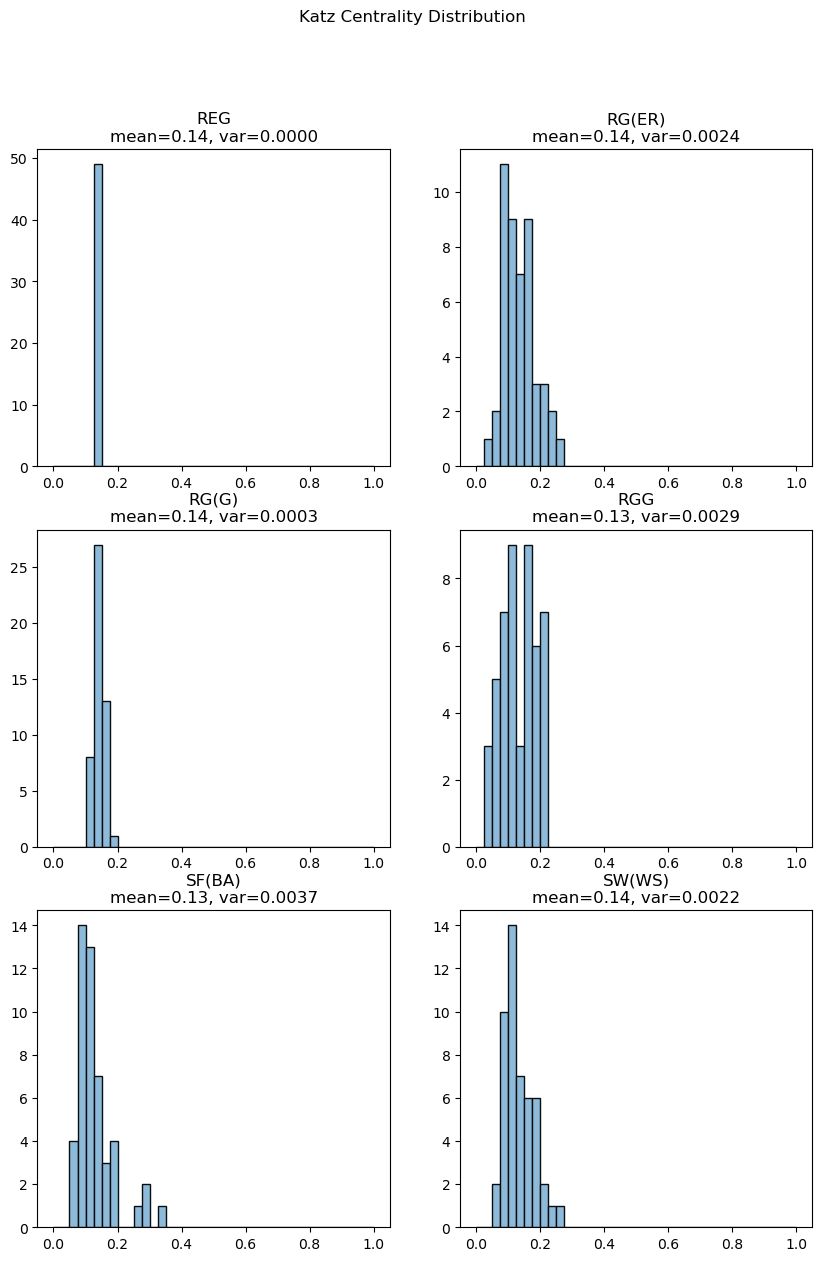

In [18]:
def katz_centrality(G):
    max_eigenvalue = nx.adjacency_spectrum(G).real.max()
    alpha = 1 / max_eigenvalue - 0.01
    return nx.katz_centrality(G, alpha=alpha)


plot_grid(graphs, plot_centrality_distribution(katz_centrality), 'Katz Centrality Distribution')
plt.show()

#### Σχόλια

Παρατηρούμε πως οι μέσες τιμές είναι περίπου παντού ίσες. Στην κατανομή του SF(BA) βλέπουμε ένα διαχωρισμό μεταξύ των hubs (μεγάλη Katz κεντρικότητα) και των υπολοίπων κόμβων.

#### Να προσδιοριστούν, για κάθε τοπολογία, οι πιο κεντρικοί κόμβοι ως προς το βαθμό, την εγγύτητα, την ενδιαμεσική κεντρικότητα και την κεντρικότητα Katz. Να σχολιαστούν τα αποτελέσματα.

In [19]:
def most_central(G, centrality_fn):
    centralities = centrality_fn(G)
    assert isinstance(centralities, dict)
    max_centrality = max(centralities.values())
    most_central_nodes = [node for node, centrality in centralities.items() if centrality == max_centrality]
    return dict(most_central_nodes=most_central_nodes, max_centrality=max_centrality)


centrality_fns = {
    'degree_centrality': nx.degree_centrality,
    'closeness_centrality': nx.closeness_centrality,
    'betweeness_centrality': nx.betweenness_centrality,
    'katz_centrality': katz_centrality
}

{
    graph_name: {fn_name: most_central(G, centrality_fn) for fn_name, centrality_fn in centrality_fns.items()
                } for graph_name, G in graphs.items()
}

{'REG': {'degree_centrality': {'most_central_nodes': [0,
    1,
    2,
    3,
    4,
    5,
    6,
    7,
    8,
    9,
    10,
    11,
    12,
    13,
    14,
    15,
    16,
    17,
    18,
    19,
    20,
    21,
    22,
    23,
    24,
    25,
    26,
    27,
    28,
    29,
    30,
    31,
    32,
    33,
    34,
    35,
    36,
    37,
    38,
    39,
    40,
    41,
    42,
    43,
    44,
    45,
    46,
    47,
    48],
   'max_centrality': 0.08333333333333333},
  'closeness_centrality': {'most_central_nodes': [0,
    1,
    2,
    3,
    4,
    5,
    6,
    7,
    8,
    9,
    10,
    11,
    12,
    13,
    14,
    15,
    16,
    17,
    18,
    19,
    20,
    21,
    22,
    23,
    24,
    25,
    26,
    27,
    28,
    29,
    30,
    31,
    32,
    33,
    34,
    35,
    36,
    37,
    38,
    39,
    40,
    41,
    42,
    43,
    44,
    45,
    46,
    47,
    48],
   'max_centrality': 0.15384615384615385},
  'betweeness_centrality': {'most_central_nodes': [4

### Γ5. Αλγόριθμος PageRank σε πραγματικό δίκτυο
#####  Να εκτελεστεί ο αλγόριθμος pagerank στην 41η μεγαλύτερη συνδεδεμένη συνιστώσα (index=40) του κατευθυνόμενου δίκτυου web-Stanford του οποίου οι ακμές δίνονται στο αρχείο web-Standord.txt. 
##### Για να υπολογίσετε τις συνδεδεμένες συνιστώσες, χρησιμοποιήστε τη συνάρτηση weakly_connected_components του networkx.
Περισσότερες πληροφορίες για το dataset δίνονται στο link https://snap.stanford.edu/data/web-Stanford.html.
##### Να σχολιαστούν τα αποτελέσματα.

In [20]:
#uncomment G_web=nx.read_edgelist("web-Stanford.txt",create_using=nx.DiGraph())
G_web = nx.read_edgelist("web-Stanford.txt", create_using=nx.DiGraph())

In [21]:
#find the 40th largest weakly connected component of the graph web-Stanford
#G40 =

def get_weak_component(G, k):
    components_gen = nx.weakly_connected_components(G)
    components_list = sorted(components_gen, key=len, reverse=True)
    return components_list[k]


component40 = get_weak_component(G_web, 40)
G40 = nx.subgraph(G_web, component40)

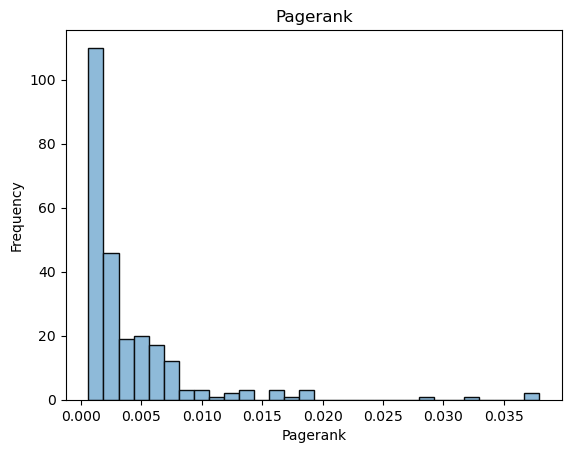

In [22]:
#pagerank
pr = nx.pagerank(G40)
plt.hist(pr.values(), bins=30, **HIST_PARAMS)
plt.title('Pagerank')
plt.xlabel('Pagerank')
plt.ylabel('Frequency')
plt.show()

#### Σχόλια

Παρατηρούμε ότι η κατανομή των Pagerank έχει βαριές ουρές. Πιθανόν η κατανομή να είναι Pareto.

### Δ) Μελέτη συνεκτικότητας και ευρωστία (robustness) δικτύων 

### Δ1. Μελέτη συνεκτικότητας
Για κάθε τύπο σύνθετου δικτύου, ορίζεται το ποσοστό συνεκτικότητας για έναν αριθμό παραγόμενων τοπολογιών, ως κλάσμα των συνδεδεμένων τοπολογιών σε σχέση με τον αριθμό όλων των παραγόμενων τοπολογιών.

Με βάση τις τιμές παραμέτρων του Πίνακα 2, μελετήστε τη συνεκτικότητα κάθε τύπου σύνθετου δικτύου του Πίνακα 1.

<table>
    <thead>
        <tr>
            <th>Τοπολογία</th>
            <th>Εύρος Παραμέτρων</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td >REG</td>
            <td rowspan=6>$n = \{100, 200\}$</td>
            <td>$d \in [2,10]$ με βήμα $2$</td>
        </tr>
        <tr>
            <td>RGER</td>
            <td>$M \in [100,800]$ με βήμα $100$</td>
        </tr>
        <tr>
            <td>RG-Gilbert</td>
            <td>$p \in [0.01,0.1]$ με βήμα $0.01$</td>
        </tr>
        <tr>
            <td>RGG</td>
            <td>$R \in [0.025,0.25]$ με βήμα $0.025$</td>
        </tr>
        <tr>
            <td>SF</td>
            <td>$d \in [2,10]$ με βήμα $2$</td>
        </tr>
        <tr>
            <td>SW</td>
            <td>$d \in [2,10]$ με βήμα $2$ και $g_p \in [0.1,0.7]$ με βήμα $0.1$</td>
        </tr>
    </tbody>
    <caption>Πίνακας 2</caption>
</table>

#### Δ1.1 Για κάθε έναν τύπο δικτύου, να παράξετε 100 διαφορετικές τοπολογίες και να παρουσιάσετε το διάγραμμα ποσοστού συνεκτικότητας σε σχέση με τις καθορισμένες παραμέτρους κάθε δικτύου.

#### Δ1.2 Σε ποιες περιπτώσεις εμφανίζονται φαινόμενα κατωφλίου;

***Απάντηση***

Φαινόμενο κατωφλίου παρουσιάζεται στις περιπτώσεις των

* RG(ER) με $n=100$

* RG(G) με $n=200$

* RGG με $n=100$ και $n=200$

* SW(WS) για $k=4$


#### Δ1.3 Ποιες είναι οι κρίσιμες τιμές για κάθε τύπο δικτύου οι οποίες οδηγούν σε μετάβαση φάσης (phase transitions);

***Απάντηση***

* RG(ER): m=300 με $n=100$

* RG(G): p=0.05 με $n=200$

* RGG: radius=0.175 με $n=100$, και 0.125 με $n=200$

* SW(WS): k=4 με $n=100$ και $n=200$

#### Δ1.4 Ποιες μεταβάσεις φάσης είναι απότομες (sharp) και ποιες ομαλές (smooth);

***Απάντηση***

Οι απότομες είναι οι του ερωτήματος Δ1.2, ενώ οι ομαλές είναι και στο RG(ER) με $n=200$ και RG(G) με $n=100$.


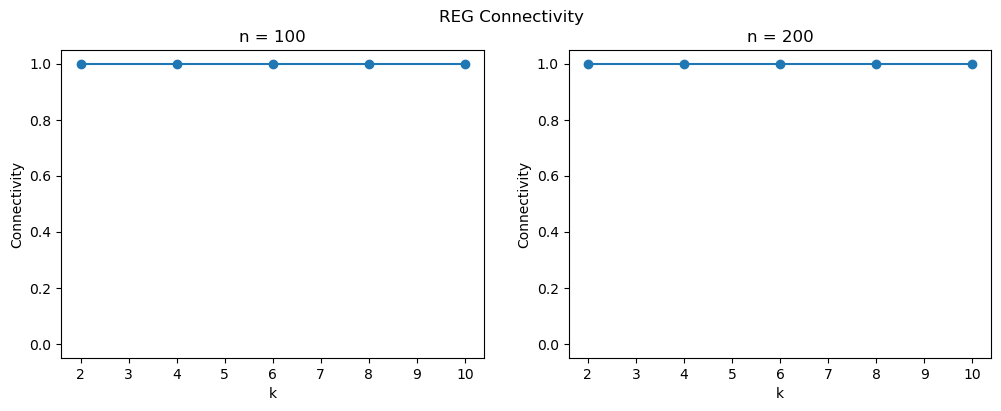

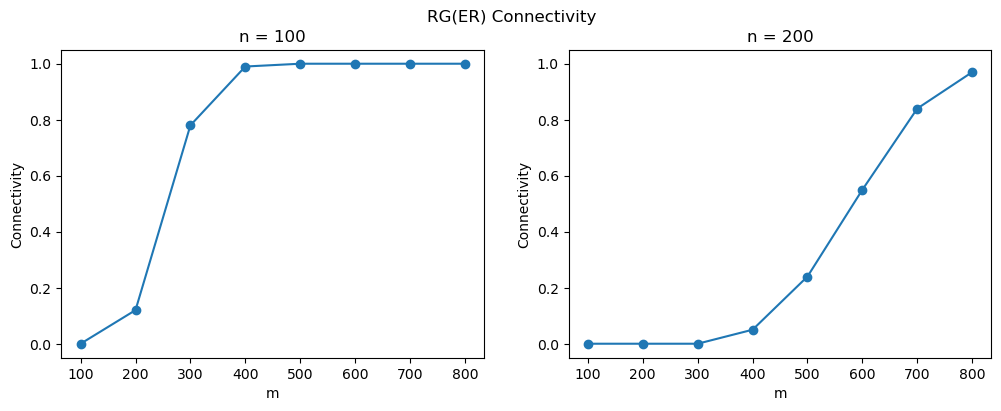

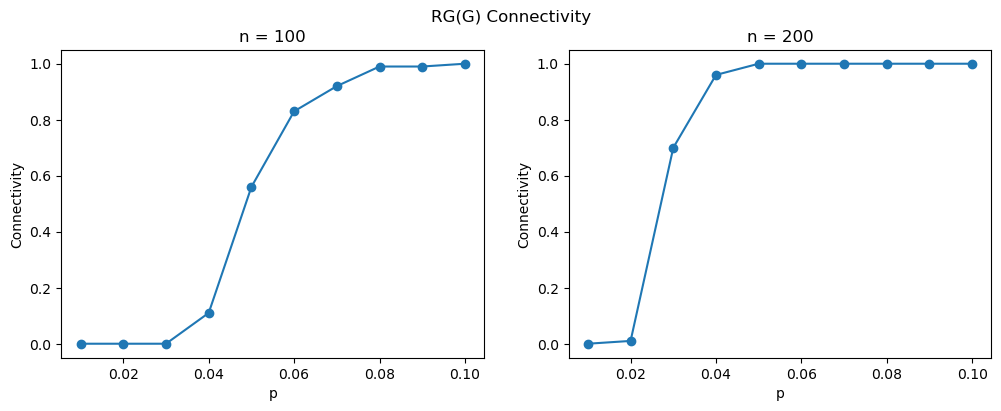

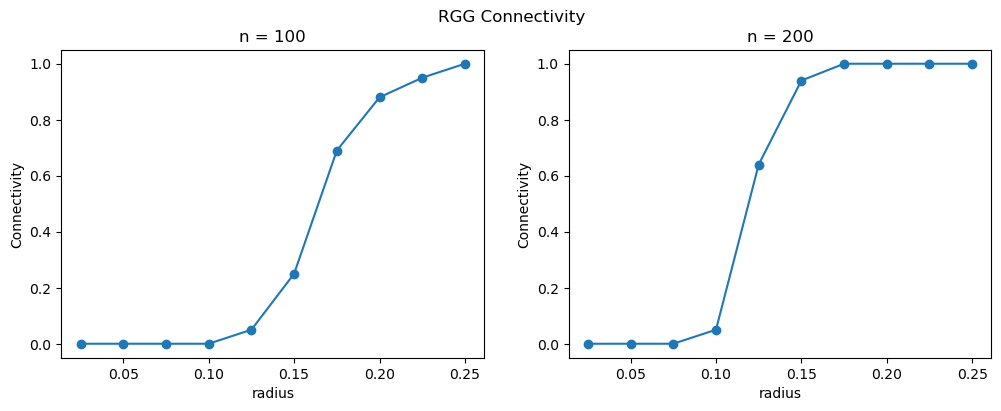

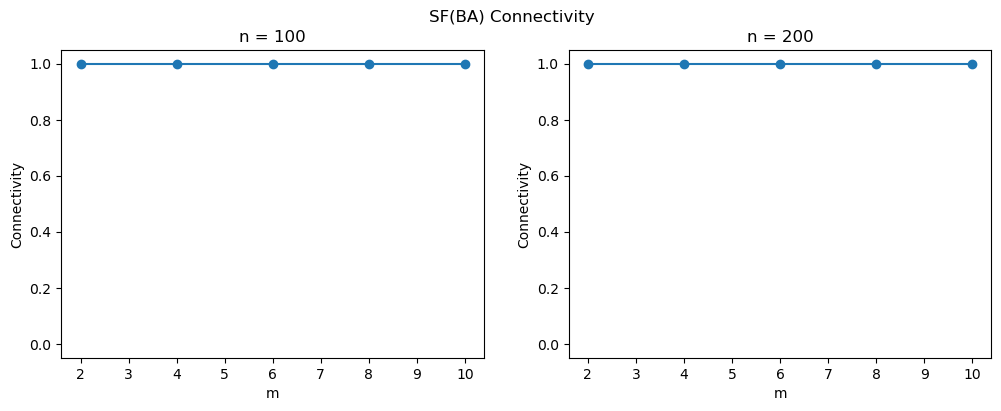

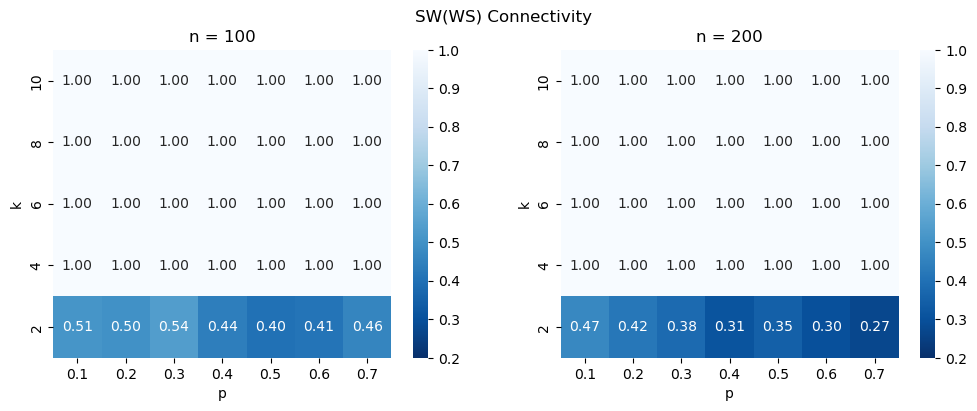

In [23]:
import seaborn as sns
        
        
spec = {
    'REG': {
        'fn': functools.partial(nx.watts_strogatz_graph, p=0),
        'params': {
            'k': np.arange(2, 12, 2)
        },
    },
    'RG(ER)': {
        'fn': nx.gnm_random_graph,
        'params': {
            'm': np.arange(100, 900, 100)
        },
    },
    'RG(G)': {
        'fn': nx.gnp_random_graph,
        'params': {
            'p': np.arange(0.01, 0.101, 0.01)
        },
    },
    'RGG': {
        'fn': nx.random_geometric_graph,
        'params': {
            'radius': np.arange(0.025, 0.275, 0.025)
        },
    },
    'SF(BA)': {
        'fn': nx.barabasi_albert_graph,
        'params': {
            'm': np.arange(2, 12, 2)
        },
    },
    'SW(WS)': {
        'fn': nx.watts_strogatz_graph,
        'params': {
            'k': np.arange(2, 12, 2),
            'p': np.round_(np.arange(0.1, 0.8, 0.1), 2)
        }
    }
}


def named_product(**kwargs):
    for p in itertools.product(*kwargs.values()):
        yield dict(zip(kwargs, p))
        

def simulate_connectivity(fn, params, n, n_trials=100):
    n_connected = [sum(nx.is_connected(fn(n=n, **p)) for _ in range(n_trials))
                   for p in named_product(**params)]
    connectivity = np.array(n_connected) / n_trials
    return connectivity


def param_plot(params: dict, connectivity, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    
    if len(params) == 1:
        (param_name, param_vals), = params.items()
        ax.plot(param_vals, connectivity, '-o')
        ax.set_xlabel(param_name)
        ax.set_ylabel('Connectivity')
        ax.set_ylim(-0.05, 1.05)
    elif len(params) == 2:
        (param_name_1, param_vals_1), (param_name_2, param_vals_2) = params.items()
        C = connectivity.reshape((len(param_vals_1), len(param_vals_2)))
        sns.heatmap(
            C,
            annot=True,
            fmt='.2f',
            xticklabels=param_vals_2,
            yticklabels=param_vals_1,
            cmap=plt.cm.Blues_r,
            vmin=0.2,
            vmax=1.0,
            ax=ax
        )
        ax.invert_yaxis()
        ax.set_xlabel(param_name_2)
        ax.set_ylabel(param_name_1)
    else:
        raise ValueError('params dict needs to be of length 1 or 2 to be plotted')
    
    return ax


def param_plot_grid(d, suptitle=None):
    ns = (100, 200)
    fig, axs = plt.subplots(ncols=len(ns), figsize=(6 * len(ns), 4))

    for n, ax in zip(ns, axs.flat):
        connectivity = simulate_connectivity(n=n, **d)
        param_plot(d['params'], connectivity, ax=ax)
        ax.set_title(f'n = {n}')
    
    fig.suptitle(suptitle)
    return axs


for name, d in spec.items():
    param_plot_grid(d, f'{name} Connectivity')
plt.show()

### Δ2. Μελέτη ευρωστίας δικτύου

#### Για κάθε μια από τις τοπολογίες REG, RG(ER), RGG, SF(BA) και SW(WS) που εξετάστηκαν στις ενότητες Β και Γ, να υπολογιστεί με τη συνάρτηση minimum_node_cut ο ελάχιστος αριθμός κόμβων που πρέπει να αφαιρεθούν για να προκύψει μη συνδεδεμένο δίκτυο. 
#### Να σχολιαστούν τα αποτελέσματα.

In [24]:
{name: len(nx.minimum_node_cut(G)) if nx.is_connected(G) else None for name, G in graphs.items()}

{'REG': 4, 'RG(ER)': 1, 'RG(G)': 16, 'RGG': 3, 'SF(BA)': 4, 'SW(WS)': 2}

#### Σχόλια

Παρατηρούμε πως στο RG(G) έχουμε τον μέγιστο minimum node cut. 

### E) Μελέτη της εξελικτικής μετατροπής δικτύου REG σε δίκτυο SW και RGER

##### Μεταβάλλοντας την παράμετρο $g_p$ από $0$ έως $1$ με βήμα $0.1$της συνάρτησης που κατασκευάζει τοπολογίες SW μεγέθους $n=30x$ ( αντικαταστήστε το x με το τελευταίο ψηφίο του ΑΜ) με βαθμό αρχικού πλέγματος $d=4$, να βρείτε το μέσο μήκος μονοπατιού και το μέσο συντελεστή ομαδοποίησης. Πώς συμπεριφέρεται το παραγόμενο δίκτυο για $g_p = 0$, πώς για $g_p = 1$ και πώς για ενδιάμεσες τιμές $g_p \simeq 0.1 - 0.5$;

In [25]:
# random.seed(seedno)
#n=30x
d = 4
n = 309

def multimap(fns, *its):
    return zip(*map(lambda x: tuple(fn(x) for fn in fns), *its))

ps = np.round_(np.arange(0, 1.1, 0.1), 2)
gs = (nx.watts_strogatz_graph(n=n, k=d, p=p, seed=seedno) for p in ps)
aspl, ac = multimap([nx.average_shortest_path_length, nx.average_clustering], gs)

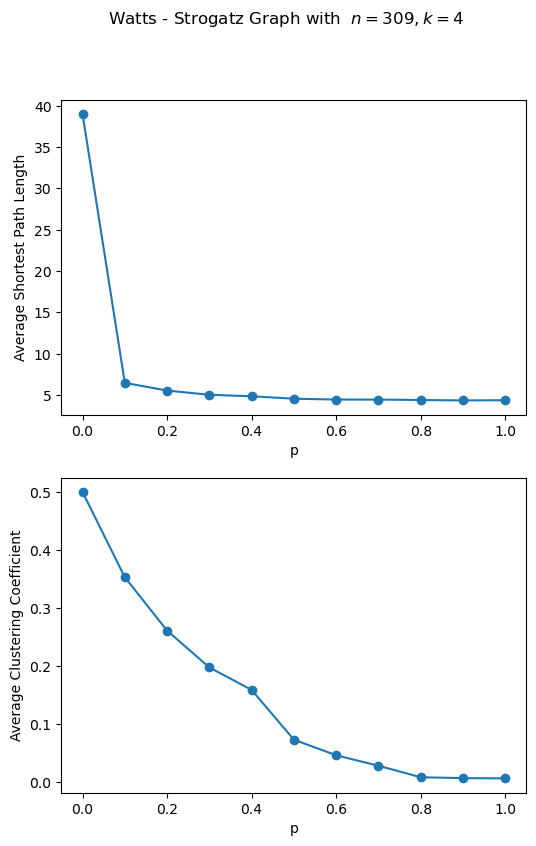

In [26]:
fig, axs = plt.subplots(2, figsize=(6, 9))

axs[0].plot(ps, aspl, '-o')
axs[0].set_xlabel('p')
axs[0].set_ylabel('Average Shortest Path Length')

axs[1].plot(ps, ac, '-o')
axs[1].set_xlabel('p')
axs[1].set_ylabel('Average Clustering Coefficient')

fig.suptitle(f'Watts - Strogatz Graph with  $n = {n}, k = {d}$')
plt.show()

#### Σχόλια

Παρατηρούμε πως το average shortest path πέφτει αμέσως και παραμένει χαμηλά, ενώ το average clustering coefficient μειώνεται ομαλά.

Στο 0 έχουμε ότι το shortest path είναι σταθερά 39 και το clustering coefficient σταθερά 0.5.

Στο 1 έχουμε ότι το average shortest path είναι 5 και το average clustering coefficient είναι σχεδόν 0. 

### Z) Αναγνώριση τύπου πραγματικού δικτύου 
##### Για το πραγματικό δίκτυο που δίνεται στο αρχείο got.txt  και αφορά στις αλληλεπιδράσεις των χαρακτήρων του Game of Thrones στον πρώτο κύκλο επεισοδίων (https://github.com/mathbeveridge/gameofthrones) να βρεθούν:</p>
<ol>
    <li>Η κατανομή του βαθμού κόμβου και ο μέσος βαθμός.</li>
    <li>Η κατανομή του συντελεστή ομαδοποίησης και ο μέσος συντελεστής ομαδοποίησης.</li>
    <li>Το μέσο μήκος μονοπατιού.</li>
</ol>
<p style=text-align:justify>Να οπτικοποιηθεί το δίκτυο. Να συγκριθούν τα αποτελέσματα σε σχέση με αυτά των συνθετικών τοπολογιών. Να χαρακτηρίσετε τον τύπο της τοπολογίας με βάση τους τύπους δικτύων που εξετάστηκαν στις ενότητες B, Γ.</p>

In [27]:
G_got = nx.Graph()
with open('got.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        G_got.add_edge(row[0], row[1], weight=row[2])

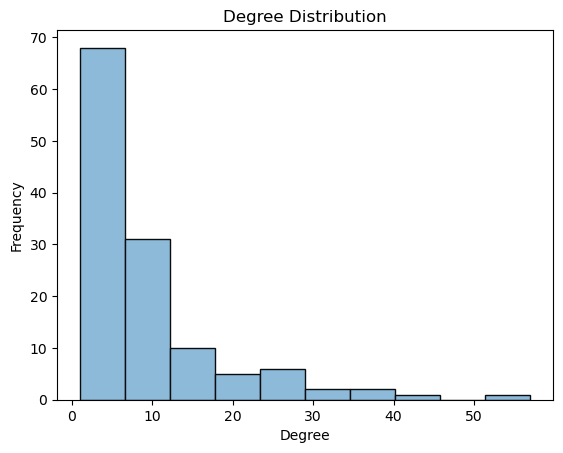

In [28]:
degrees = dict(G_got.degree())

plt.hist(degrees.values(), **HIST_PARAMS)
plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()

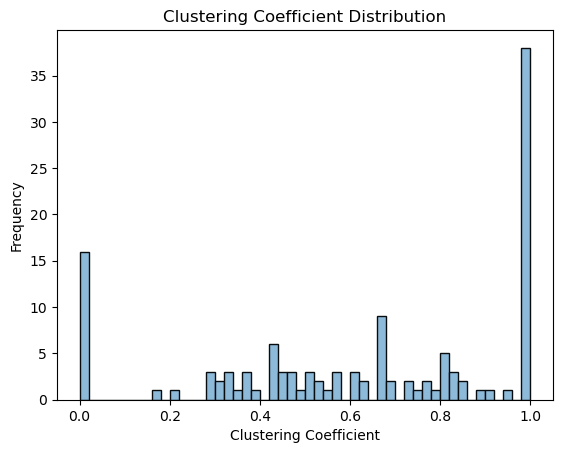

In [29]:
ccs = nx.clustering(G_got)

plt.hist(ccs.values(), bins=50, **HIST_PARAMS)
plt.title('Clustering Coefficient Distribution')
plt.xlabel('Clustering Coefficient')
plt.ylabel('Frequency')
plt.show()

In [30]:
print(f'Average shortest path length: {nx.average_shortest_path_length(G_got):.3f}')

Average shortest path length: 2.645


#### Σχόλια

Η κατανομή των βαθμών φαίνεται να έχει βαριές ουρές, και πιο συγκεκριμένα, να ακολουθεί το power law, δηλαδή το δίκτυο φαίνεται να είναι scale free.

Η κατανομή του clustering coefficient φαίνεται να καλύπτει σχεδόν όλο το εύρος του [0, 1], με μεγάλη συγκέντρωση στο 1, που αντιπροσωπεύει τους κόμβους οι οποίοι ανήκουν σε κλίκα. Το 0 αντιπροσωπεύει κόμβους οι οποίοι είναι οι μοναδικοί συνδετήρες των γειτόνων τους.

#### Ποιοι ήταν οι 5 κεντρικότεροι χαρακτήρες του πρώτου κύκλου επεισοδίων ως προς το βαθμό, την εγγύτητα και την ενδιαμεσικότητα ? 

In [31]:
def top_k(fn, G, k):
    return sorted(fn(G).items(), key=operator.itemgetter(1), reverse=True)[:k]


{name: top_k(cfn, G_got, 5) for name, cfn in centrality_fns.items() if name != 'katz_centrality'}

{'degree_centrality': [('NED', 0.456),
  ('TYRION', 0.328),
  ('ROBERT', 0.28800000000000003),
  ('CATELYN', 0.28800000000000003),
  ('ROBB', 0.24)],
 'closeness_centrality': [('NED', 0.628140703517588),
  ('ROBERT', 0.5530973451327433),
  ('CATELYN', 0.5506607929515418),
  ('TYRION', 0.5434782608695652),
  ('JON', 0.5186721991701245)],
 'betweeness_centrality': [('NED', 0.3032802081478768),
  ('TYRION', 0.16302743524270866),
  ('CATELYN', 0.11828405295282027),
  ('ROBERT', 0.11039475684723862),
  ('DAENERYS', 0.10143128748178003)]}